<a href="https://colab.research.google.com/github/ranjithtg-omr/AI_ML_RANJITH/blob/Second-intermediate/Pandas_Tasks_adult_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.read the data

In [3]:
filepath = '/adult.csv'
adult_data = pd.read_csv(filepath)
adult_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


2.Display the first 5 rows of the dataset.

In [36]:
adult_data.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary,age_group
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,Youth
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,Adult
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,Youth
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,Adult
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0,Youth


3.summary of the DataFrame

In [6]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


4.descriptive statistics for numeric columns

In [7]:
adult_data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


5.Display the column names of the DataFrame.

In [19]:
adult_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'income_binary', 'age_group'],
      dtype='object')

6.unique values in the 'workclass' column.

In [20]:
adult_data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

7.Create a new column 'income_binary' where <=50K is 0 and >50K is 1.

In [59]:
adult_data['income_binary'] = adult_data['income'].map({'<=50K': 0, '>50K': 1})
display(adult_data[['income', 'income_binary']].head())

,income,income_binary
0,<=50K,0
1,<=50K,0
2,>50K,1
3,>50K,1
4,<=50K,0


8.Create a new column 'age_group' categorizing ages into 'Youth' (< 30), 'Adult' (30-60), and 'Senior' (60+).

In [62]:
bins = [0, 30, 60, float('inf')]
labels = ['Youth', 'Adult', 'Senior']
adult_data['age_group'] = pd.cut(adult_data['age'], bins=bins, labels=labels, right=False)
display(adult_data[['age', 'age_group']].head())

,age,age_group
0,25,Youth
1,38,Adult
2,28,Youth
3,44,Adult
4,18,Youth


9.Rename the 'educational-num' column to 'education_num'.

In [64]:
adult_data = adult_data.rename(columns={'educational-num': 'education_num'})
display(adult_data.head())

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary,age_group
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,Youth
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,Adult
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,Youth
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,Adult
4,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K,0,Youth


10.Replace the missing values represented by '?' in 'workclass' and 'occupation' columns with 'Unknown'.

In [65]:
adult_data['workclass'] = adult_data['workclass'].replace('?', 'Unknown')
adult_data['occupation'] = adult_data['occupation'].replace('?', 'Unknown')
display(adult_data.head())

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary,age_group
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,Youth
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,Adult
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,Youth
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,Adult
4,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K,0,Youth


11.Calculate the average age for each workclass.

In [16]:
average_age_per_workclass = adult_data.groupby('workclass')['age'].mean()
print(average_age_per_workclass)

workclass
?                   40.141122
Federal-gov         42.577514
Local-gov           41.676020
Never-worked        19.900000
Private             36.903144
Self-emp-inc        45.799410
Self-emp-not-inc    45.332470
State-gov           39.512367
Without-pay         47.285714
Name: age, dtype: float64


12.Find the total capital-gain for each gender.

In [17]:
total_capital_gain_per_gender = adult_data.groupby('gender')['capital-gain'].sum()
print(total_capital_gain_per_gender)

gender
Female     9403120
Male      43300701
Name: capital-gain, dtype: int64


13.Get the count of each marital-status category

In [50]:
marital_status_counts = adult_data['marital-status'].value_counts()
print(marital_status_counts)

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


14.Find the mean hours-per-week worked by individuals in different education levels.

In [22]:
mean_hours_per_week_per_education = adult_data.groupby('education')['hours-per-week'].mean()
print(mean_hours_per_week_per_education)

education
10th            36.986321
11th            33.952539
12th            35.374429
1st-4th         38.761134
5th-6th         38.923379
7th-8th         39.003141
9th             38.359788
Assoc-acdm      40.809494
Assoc-voc       41.658418
Bachelors       42.482492
Doctorate       46.582492
HS-grad         40.640775
Masters         43.575837
Preschool       36.566265
Prof-school     47.579137
Some-college    38.865784
Name: hours-per-week, dtype: float64


15.Calculate the mean, median, and standard deviation of 'fnlwgt' for each race.

In [23]:
fnlwgt_stats_per_race = adult_data.groupby('race')['fnlwgt'].agg(['mean', 'median', 'std'])
print(fnlwgt_stats_per_race)

                             mean    median            std
race                                                      
Amer-Indian-Eskimo  120110.985106  101579.0   94655.908850
Asian-Pac-Islander  159796.946675  139850.0   86997.647681
Black               230485.070438  208266.0  125445.929357
Other               195715.689655  188066.5   94063.712981
White               186894.995738  177287.0  102637.466726


16.Get the unique values and their counts for the 'native-country' column

In [24]:
native_country_counts = adult_data['native-country'].value_counts()
print(native_country_counts)

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

17.Filter the dataset to include only individuals with income >50K.

In [25]:
income_greater_than_50k = adult_data[adult_data['income'] == '>50K']
income_greater_than_50k.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary,age_group
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,Youth
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,Adult
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,1,Senior
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K,1,Senior
14,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K,1,Adult


18.Sort the dataset by age in descending order.

In [26]:
adult_data_sorted_by_age = adult_data.sort_values(by='age', ascending=False)
adult_data_sorted_by_age.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary,age_group
18584,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K,0,Senior
47977,90,?,313986,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,>50K,1,Senior
7419,90,Self-emp-not-inc,122348,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,45,United-States,>50K,1,Senior
10735,90,Local-gov,188242,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,11678,0,40,United-States,>50K,1,Senior
35770,90,Private,84553,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K,0,Senior


19.Filter the dataset to include only individuals who work more than 40 hours per week.



In [27]:
adult_data_high_hours = adult_data[adult_data['hours-per-week'] > 40]
adult_data_high_hours.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary,age_group
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,Adult
14,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K,1,Adult
15,43,Private,346189,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K,1,Adult
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K,1,Adult
20,34,Private,107914,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,47,United-States,>50K,1,Adult


20.Calculate the percentage of missing values in each column.

In [34]:
missing_values_percentage = (adult_data.isnull().sum() / len(adult_data)) * 100
print(missing_values_percentage)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
gender            0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
income_binary     0.0
age_group         0.0
dtype: float64


21.Calculate the median income by education level and gender

In [33]:
median_income_by_education_gender = adult_data.groupby(['education', 'gender'])['income_binary'].median()
print(median_income_by_education_gender)

education     gender
10th          Female    0.0
              Male      0.0
11th          Female    0.0
              Male      0.0
12th          Female    0.0
              Male      0.0
1st-4th       Female    0.0
              Male      0.0
5th-6th       Female    0.0
              Male      0.0
7th-8th       Female    0.0
              Male      0.0
9th           Female    0.0
              Male      0.0
Assoc-acdm    Female    0.0
              Male      0.0
Assoc-voc     Female    0.0
              Male      0.0
Bachelors     Female    0.0
              Male      1.0
Doctorate     Female    1.0
              Male      1.0
HS-grad       Female    0.0
              Male      0.0
Masters       Female    0.0
              Male      1.0
Preschool     Female    0.0
              Male      0.0
Prof-school   Female    0.0
              Male      1.0
Some-college  Female    0.0
              Male      0.0
Name: income_binary, dtype: float64


22.Find the top 3 occupations with the highest average capital-gain.

In [51]:
top_occupations_capital_gain = adult_data.groupby('occupation')['capital-gain'].mean().nlargest(3)
print(top_occupations_capital_gain)

occupation
Prof-specialty     2745.918017
Exec-managerial    2277.755504
Sales              1266.898256
Name: capital-gain, dtype: float64


23.Filter the dataset to include individuals who are 'Married-civ-spouse' and have an income >50K.

In [31]:
married_high_income = adult_data[(adult_data['marital-status'] == 'Married-civ-spouse') & (adult_data['income'] == '>50K')]
married_high_income.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary,age_group
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,Youth
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,Adult
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,1,Senior
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K,1,Senior
14,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K,1,Adult


24.Create 5 different charts and write your observations from the chart as comment

**CHART-1**

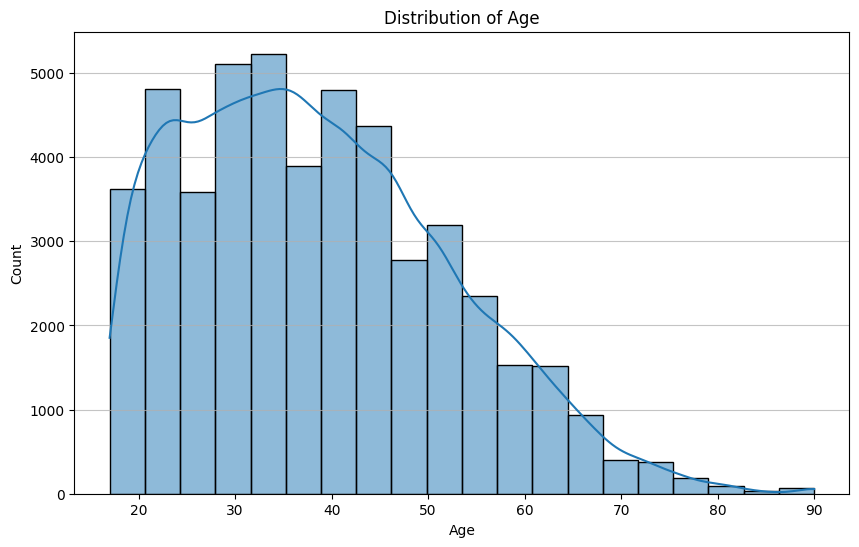

In [53]:
# Chart 1: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(adult_data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()


# Observation 1: The age distribution shows a peak around 20-40 years, indicating a younger working population, and gradually declines with increasing age.

**CHART-2**


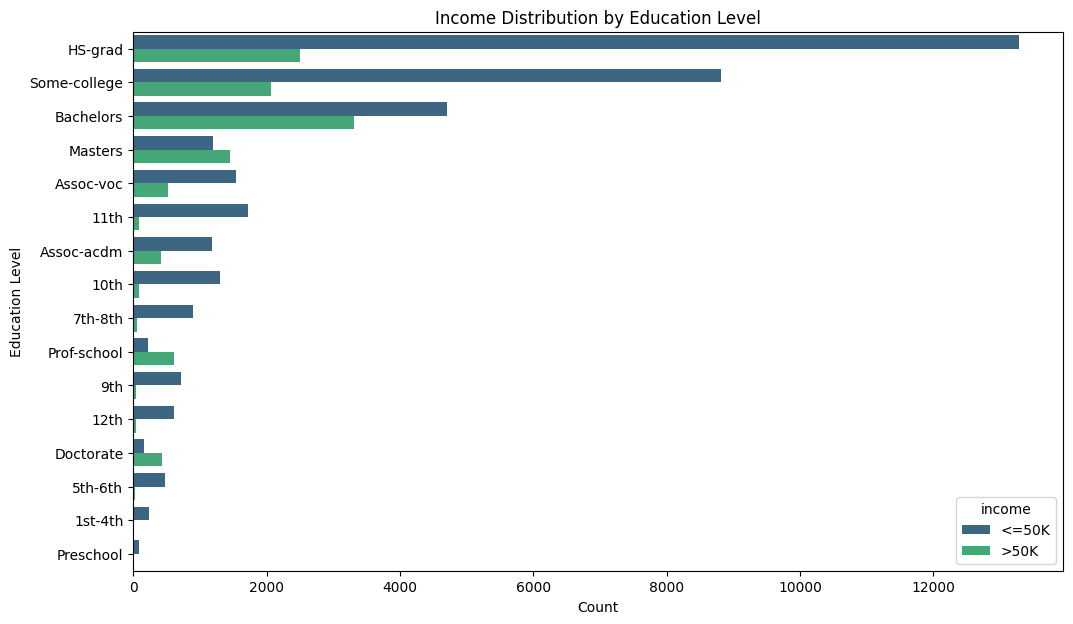

In [54]:
# Chart 2: Income Distribution by Education Level
plt.figure(figsize=(12, 7))
sns.countplot(data=adult_data, y='education', hue='income', palette='viridis', order = adult_data['education'].value_counts().index)
plt.title('Income Distribution by Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()


# Observation 2: Higher education levels like 'Bachelors', 'Masters', 'Doctorate', and 'Prof-school' show a visibly higher proportion of individuals earning >50K compared to lower education levels.


**CHART-3**

/tmp/ipython-input-1376094852.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=adult_data, y='workclass', palette='cubehelix', order = adult_data['workclass'].value_counts().index)


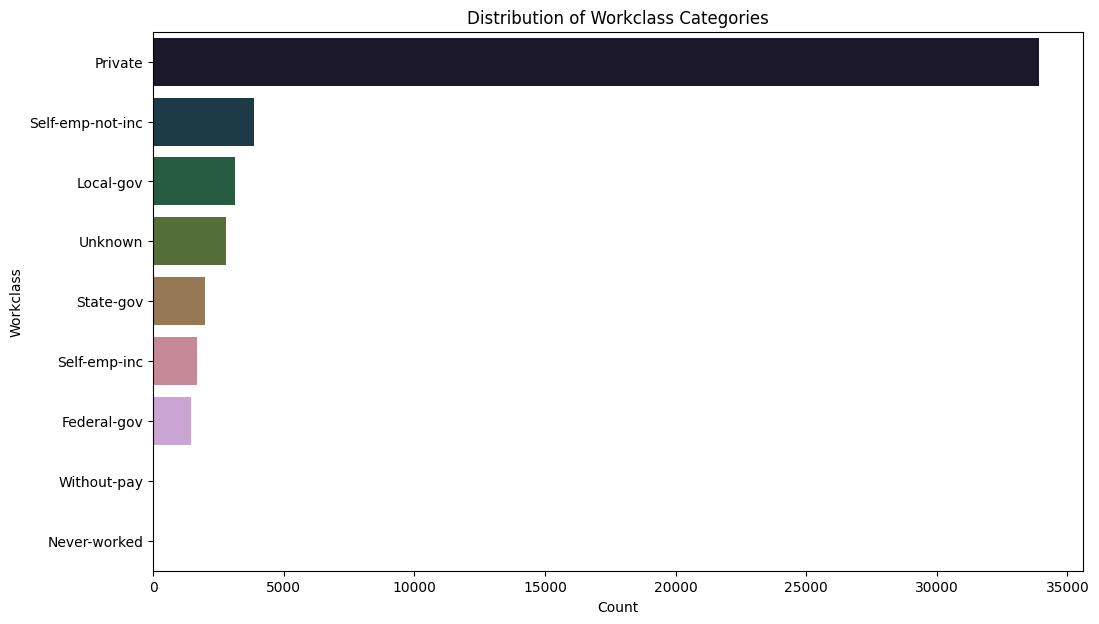

In [55]:
# Chart 3: Workclass Distribution
plt.figure(figsize=(12, 7))
sns.countplot(data=adult_data, y='workclass', palette='cubehelix', order = adult_data['workclass'].value_counts().index)
plt.title('Distribution of Workclass Categories')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.show()


# Observation 3: 'Private' is by far the most common workclass, followed by 'Self-emp-not-inc' and 'Local-gov'. There are also a significant number of 'Unknown' workclass entries.

**CHART-4**

/tmp/ipython-input-972999125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='capital-gain', data=adult_data, estimator=sum, palette='rocket')


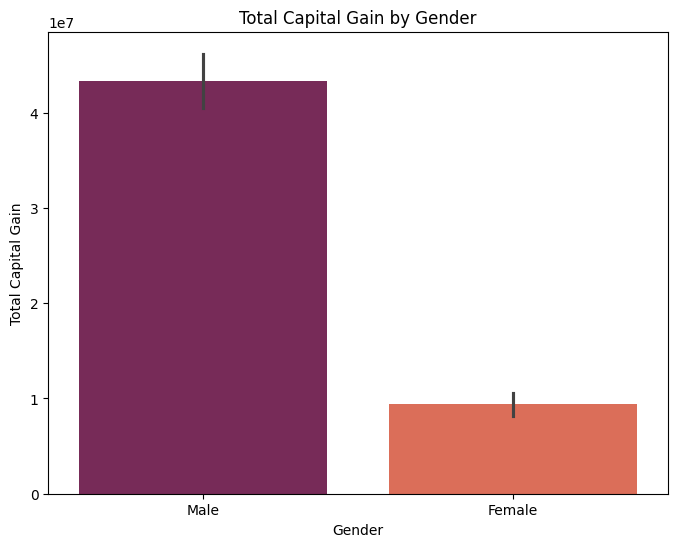

In [56]:
# Chart 4: Capital Gain by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='capital-gain', data=adult_data, estimator=sum, palette='rocket')
plt.title('Total Capital Gain by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Capital Gain')
plt.show()
# Observation 4: Males show a substantially higher total capital gain compared to females, indicating a potential disparity in investment or earnings that generate capital gains.

# Observation 4: Males show a substantially higher total capital gain compared to females, indicating a potential disparity in investment or earnings that generate capital gains.

**CHART-5**

/tmp/ipython-input-3783185063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='hours-per-week', data=adult_data, palette='coolwarm')


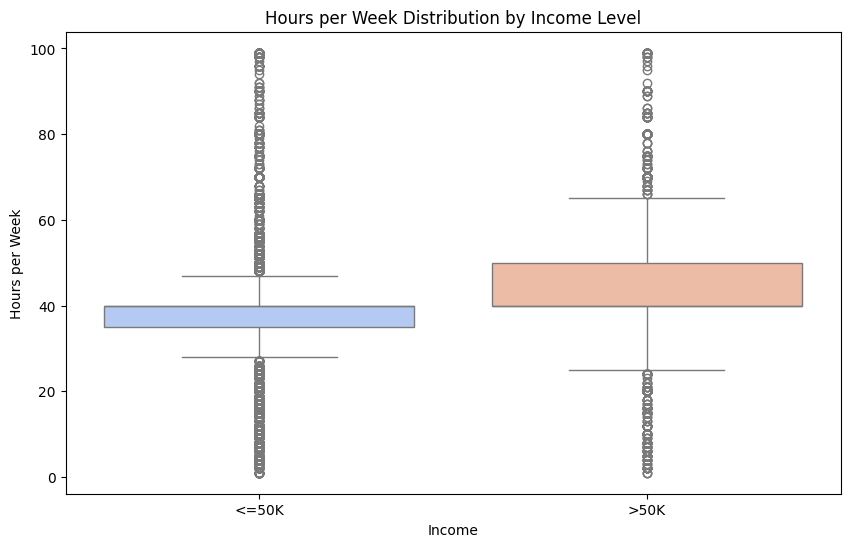

In [57]:
# Chart 5: Hours per Week Distribution by Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=adult_data, palette='coolwarm')
plt.title('Hours per Week Distribution by Income Level')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()


# Observation 5: Individuals earning >50K tend to work slightly more hours per week on average, and their distribution of hours-per-week appears to be centered at a higher value than those earning <=50K, with fewer outliers working very few hours.